Descriptive analysis and preprocessing are important steps in data analysis that involve summarizing and cleaning data to prepare it for further analysis. In Python, there are several packages and functions that can be used to perform descriptive analysis and preprocessing on different types of data.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import missingno as msno

In [32]:
data= pd.read_csv('data.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
data1 = pd.read_csv('time_series_data.csv', index_col='datetime', parse_dates=True)
data1.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vancouver          44458 non-null  float64
 1   Portland           45252 non-null  float64
 2   San Francisco      44460 non-null  float64
 3   Seattle            45250 non-null  float64
 4   Los Angeles        45250 non-null  float64
 5   San Diego          45252 non-null  float64
 6   Las Vegas          45252 non-null  float64
 7   Phoenix            45250 non-null  float64
 8   Albuquerque        45252 non-null  float64
 9   Denver             45252 non-null  float64
 10  San Antonio        45252 non-null  float64
 11  Dallas             45249 non-null  float64
 12  Houston            45250 non-null  float64
 13  Kansas City        45252 non-null  float64
 14  Minneapolis        45240 non-null  float64
 15  Saint Louis        45252 non-null  

In [36]:
print(data.columns) # to get the name of the columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [37]:
data1.columns

Index(['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles',
       'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver',
       'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis',
       'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta',
       'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh',
       'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston',
       'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya',
       'Jerusalem'],
      dtype='object')

In [38]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As gudeline when we use describe method on a data we can use the following gudelines to better undertsand our data. 
For outliers:

1. The minimum and maximum values of the data: If there are values that are significantly smaller or larger than the range of the other values, this may indicate the presence of outliers.
2. The mean and standard deviation of the data: If the standard deviation is much larger than the mean, this may indicate the presence of outliers. Similarly, if the mean is significantly different from the median, this may also indicate the presence of outliers.
3. The 25th and 75th percentiles of the data: If there are values that are significantly smaller or larger than the interquartile range (IQR) of the data, this may indicate the presence of outliers.

As seen from the values of balance min max there is a huge difference which may imply presence of outliers, the mean and STD also show the presence of outliers.

In [40]:
# describe methods removes categorical data, so to get categorical value statics we can use
categorical=data.dtypes[data.dtypes=='object'].index
data[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [17]:
data1.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,44458.000000,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,...,45250.000000,44460.000000,45250.000000,45250.000000,44455.000000,44460.000000,44461.000000,44455.000000,44456.000000,44460.000000
mean,283.862654,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,...,285.374168,285.400406,280.343010,283.779823,291.521986,294.512307,296.497276,295.266398,294.094803,293.184253
std,6.640131,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,...,10.242377,10.220932,11.953626,9.802499,7.821815,6.676412,8.852984,6.324566,6.304118,7.093583
min,245.150000,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,...,250.390000,250.774000,243.300000,249.540000,272.179000,271.049000,271.150000,271.150000,268.682000,272.974000
25%,279.160000,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,...,277.350636,277.370000,271.971750,276.090000,285.366623,289.450000,289.734000,290.467333,289.881833,287.524279
50%,283.450000,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,...,285.927583,285.870000,281.109000,284.133250,290.932667,294.900000,296.150000,294.820000,294.150000,292.996000
75%,288.600785,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,...,293.796000,293.760000,290.369583,291.620000,297.270000,299.800000,303.150000,299.660000,298.930000,299.150000
max,307.000000,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,...,308.000000,310.240000,307.880000,308.000000,314.820000,320.930000,320.150000,320.930000,313.150000,317.040000


In [41]:
# checking if there is duplicated data in the dataset
print(data.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool>


In [42]:
print(data1.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of datetime
2012-10-01 12:00:00    False
2012-10-01 13:00:00    False
2012-10-01 14:00:00    False
2012-10-01 15:00:00    False
2012-10-01 16:00:00    False
                       ...  
2017-11-29 20:00:00    False
2017-11-29 21:00:00    False
2017-11-29 22:00:00    False
2017-11-29 23:00:00    False
2017-11-30 00:00:00    False
Length: 45253, dtype: bool>


In [ ]:
# if there is duplicated values we can handle it using
# data_unique = data.drop_duplicates()

In [43]:
# ckecking missing values 
missing_values = data.isna().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [44]:
missing_values = data1.isnull().sum()
missing_values

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

<Axes: >

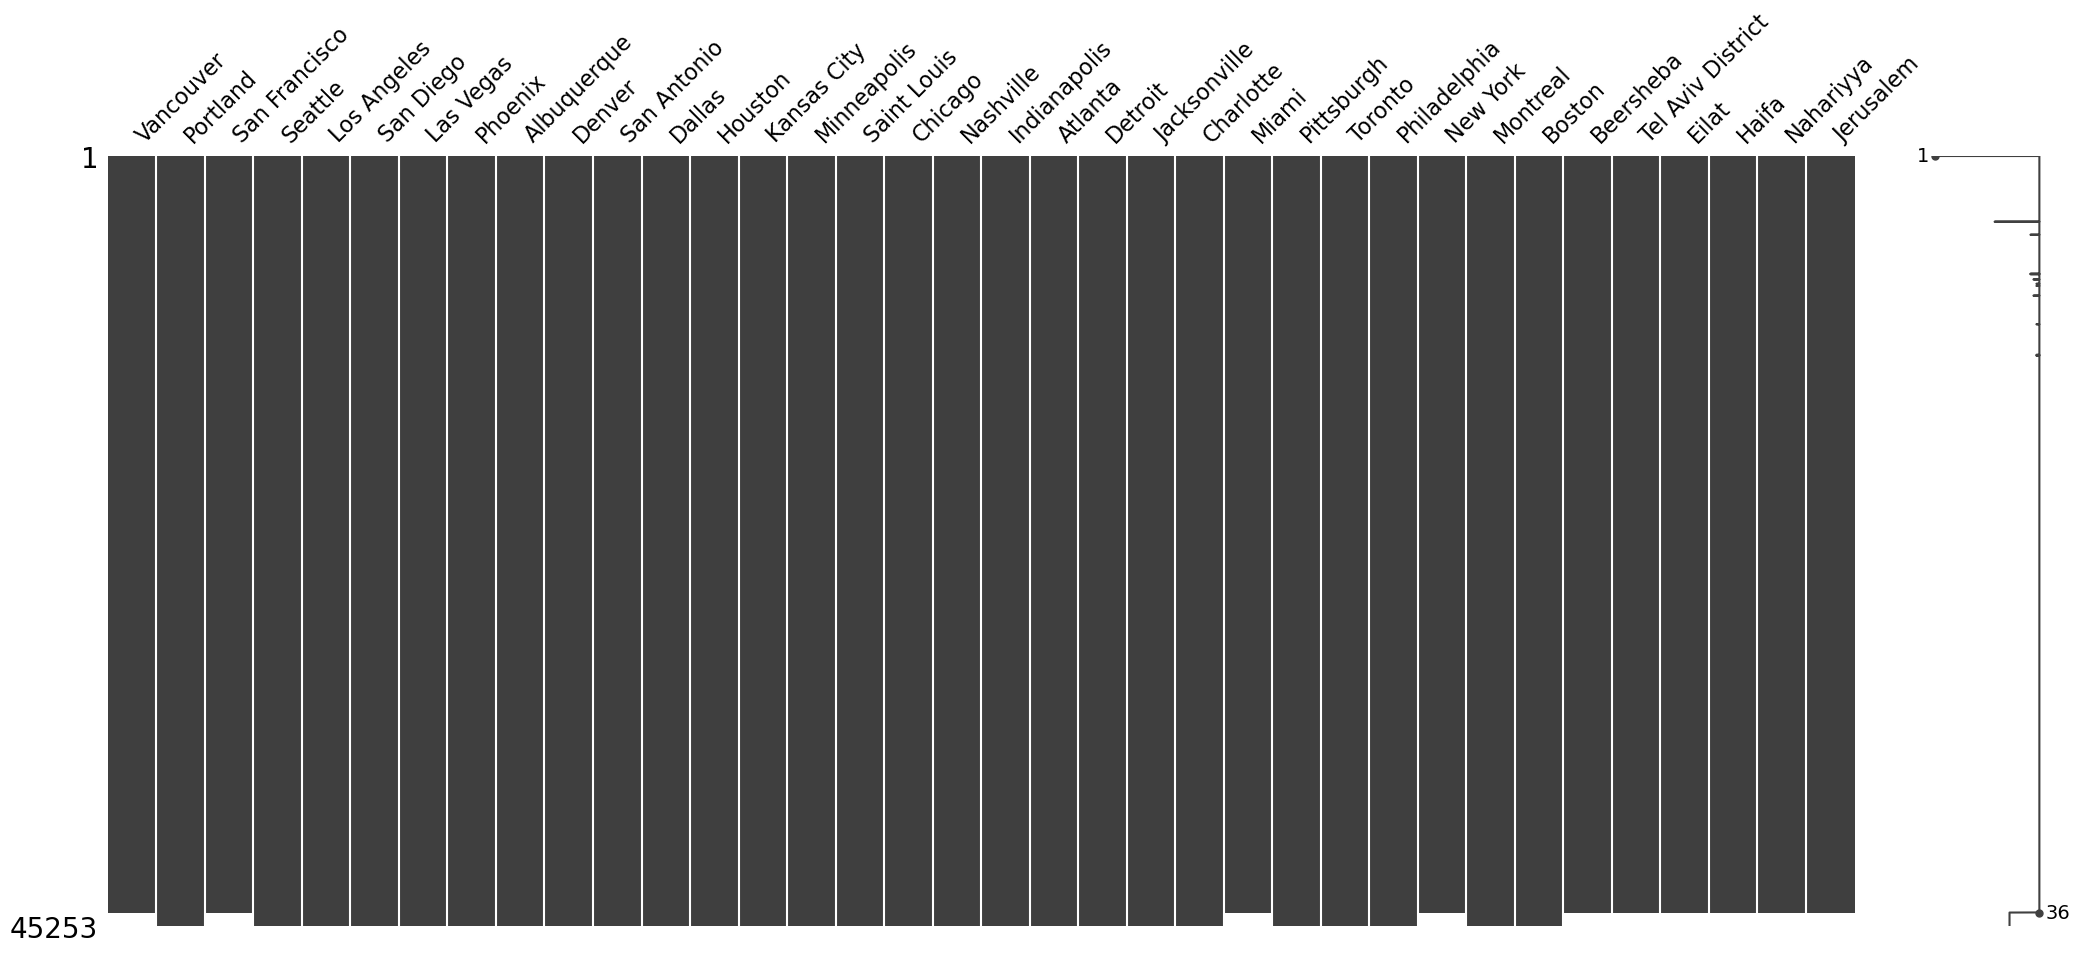

In [45]:
# we can visulaize the missing values using missingo library
# The matrix plot will show us which data points are missing and where they are located in the dataset.
msno.matrix(data1)

<Axes: >

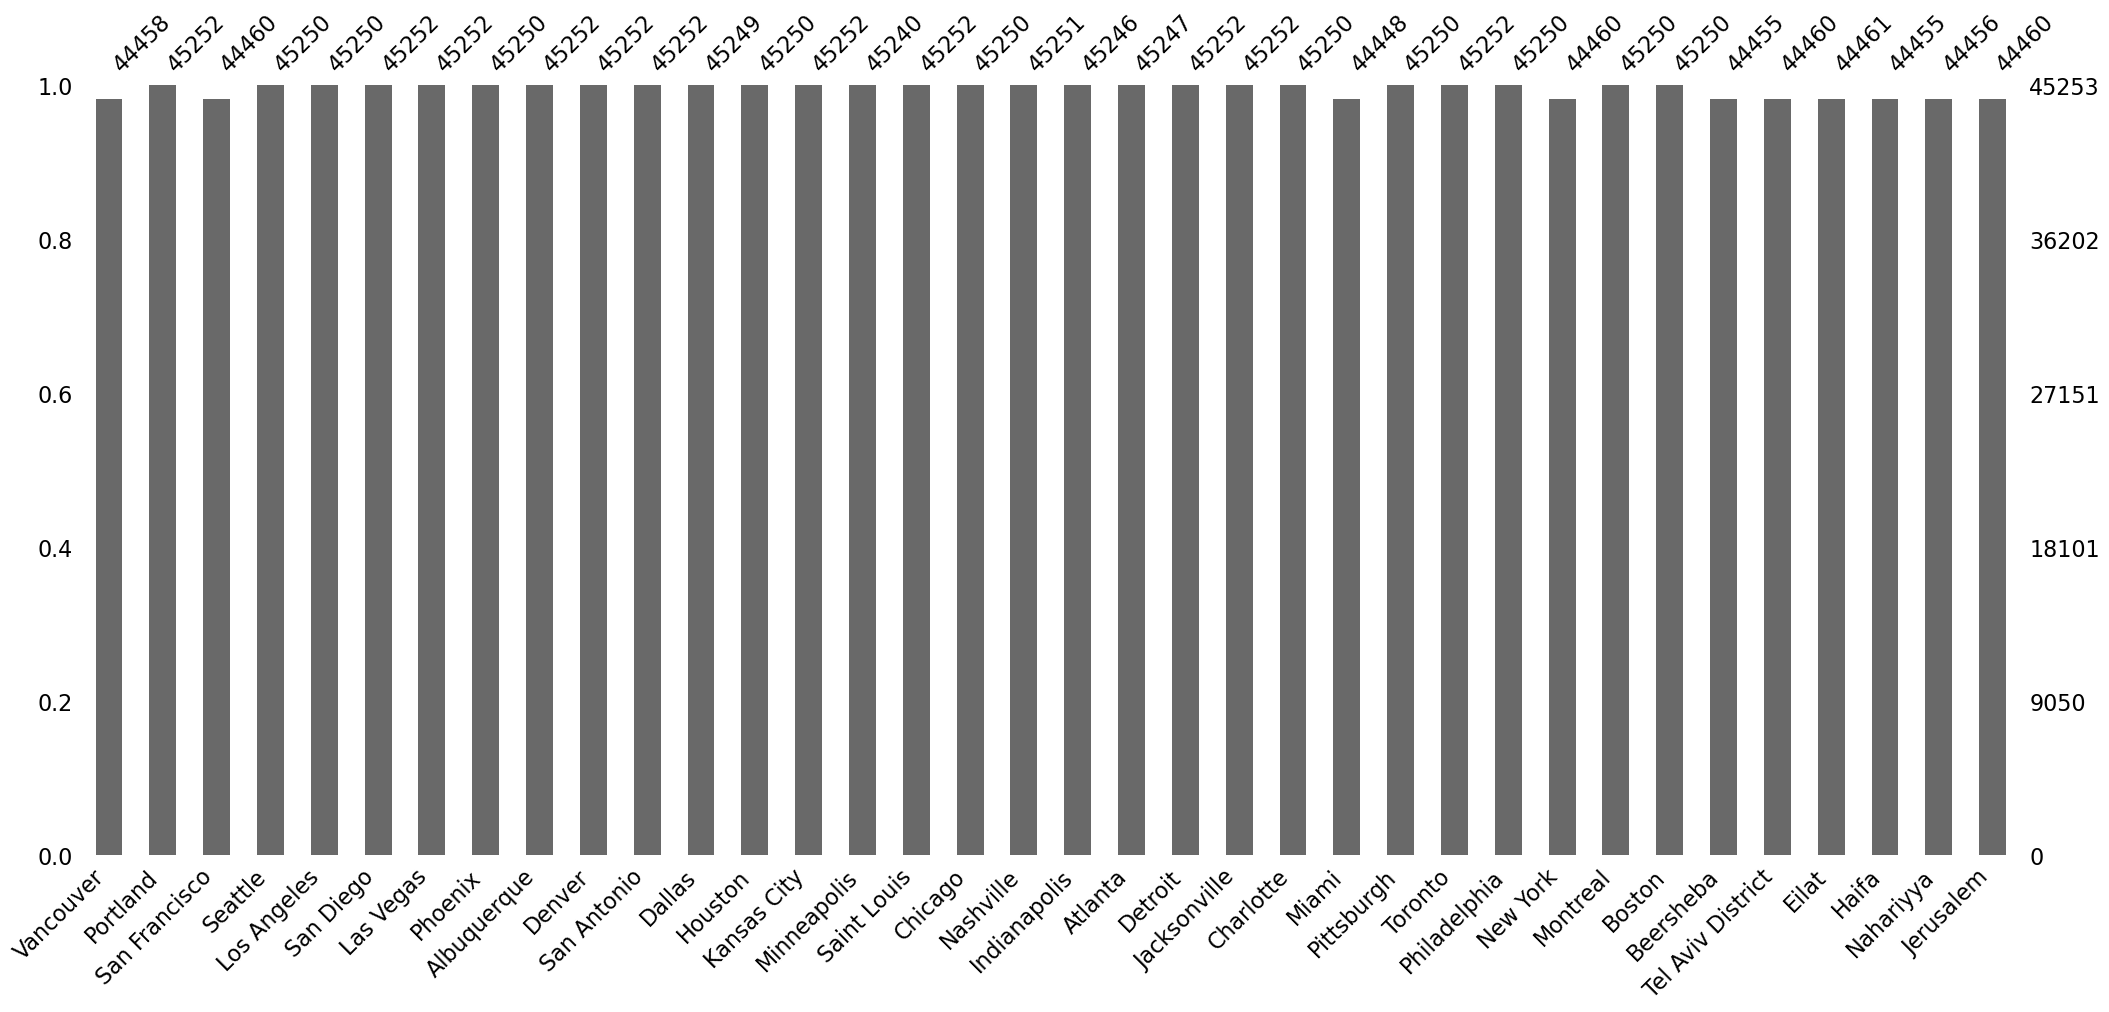

In [46]:
#
msno.bar(data1)


<Axes: >

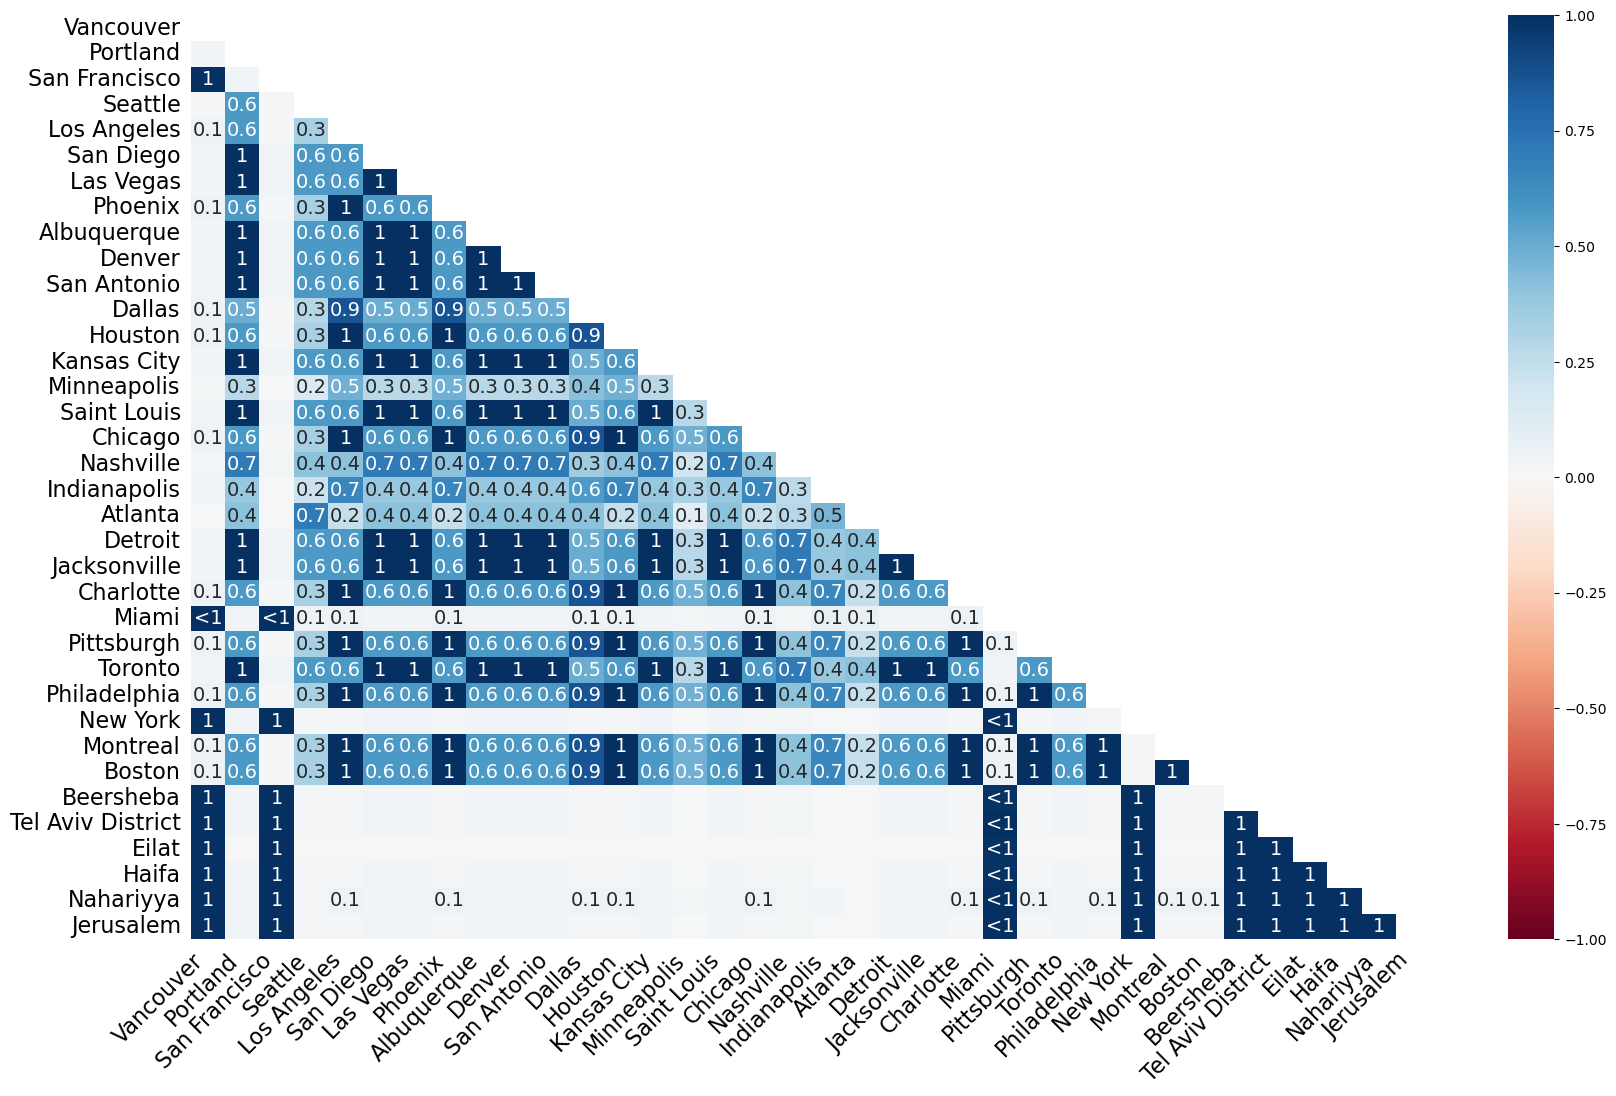

In [50]:
# The heatmap can help us identify which columns have missing values that are correlated with other columns 
# and may need to be imputed together.
msno.heatmap(data1)

There are two ways to handle missing values in the dataset 
1. Drop the values
             # Drop rows with missing values
                 data.dropna(inplace=True)
              # Drop columns with missing values
                data.dropna(axis=1, inplace=True)
2. fill the missing values

In [54]:
# Impute missing values with the mean
data1.fillna(data1.mean(), inplace=True)
data1.head()
# Impute missing values with a constant value
#data.fillna(0, inplace=True)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-31,283.293787,285.210658,289.617240,284.329966,293.255154,292.820197,294.031757,297.535125,287.119770,282.891425,...,286.946033,287.540227,283.553876,285.978777,299.396401,298.246146,300.476790,298.714945,298.713023,297.780951
2012-11-30,280.393083,281.761056,286.592826,281.012396,289.276347,289.010924,287.529389,291.783389,280.600042,280.352875,...,278.452139,279.095819,274.771326,278.143479,294.437090,293.712375,294.403604,294.944431,294.945764,293.177819
2012-12-31,277.587581,278.555784,283.403330,278.315333,286.239209,286.137814,282.164206,285.024105,274.543923,273.493309,...,277.916040,277.822878,269.378626,275.696347,290.105003,289.103921,288.888400,290.444084,290.443663,287.932162
2013-01-31,275.034871,275.151107,281.394927,275.973781,284.742942,284.679862,279.081733,282.795489,271.810549,271.909805,...,274.458473,274.276306,264.600963,271.977641,286.017868,286.758648,287.420587,288.181056,287.927130,285.236938
2013-02-28,278.289115,278.971179,283.198898,279.159787,285.734333,285.246950,282.815446,284.963670,275.306948,272.796333,...,273.751786,273.762894,266.367277,272.096747,288.145056,288.125425,289.592988,288.794163,288.785858,286.874358


In [55]:
print(data1.isnull().sum())

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64


In [52]:
# we can resample the data in the timeseries
data1=data1.resample('M').mean()
data1.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-31,283.293787,285.210658,289.617240,284.329966,293.255154,292.820197,294.031757,297.535125,287.119770,282.891425,...,286.946033,287.540227,283.553876,285.978777,299.396401,298.246146,300.476790,298.714945,298.713023,297.780951
2012-11-30,280.393083,281.761056,286.592826,281.012396,289.276347,289.010924,287.529389,291.783389,280.600042,280.352875,...,278.452139,279.095819,274.771326,278.143479,294.437090,293.712375,294.403604,294.944431,294.945764,293.177819
2012-12-31,277.587581,278.555784,283.403330,278.315333,286.239209,286.137814,282.164206,285.024105,274.543923,273.493309,...,277.916040,277.822878,269.378626,275.696347,290.105003,289.103921,288.888400,290.444084,290.443663,287.932162
2013-01-31,275.034871,275.151107,281.394927,275.973781,284.742942,284.679862,279.081733,282.795489,271.810549,271.909805,...,274.458473,274.276306,264.600963,271.977641,286.017868,286.758648,287.420587,288.181056,287.927130,285.236938
2013-02-28,278.289115,278.971179,283.198898,279.159787,285.734333,285.246950,282.815446,284.963670,275.306948,272.796333,...,273.751786,273.762894,266.367277,272.096747,288.145056,288.125425,289.592988,288.794163,288.785858,286.874358


Seasonal decomposition is a useful technique for analyzing time series data. It helps us understand the underlying patterns in the data, make accurate forecasts, preprocess the data, and identify anomalies.

In [59]:
decomposition = seasonal_decompose(data1['Vancouver'], model='additive', period=30)

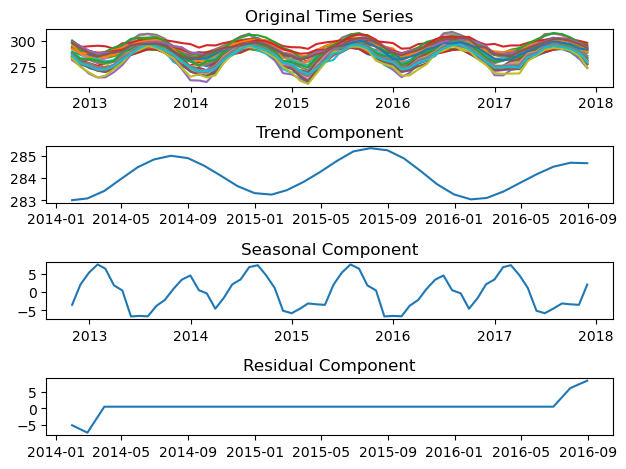

In [60]:
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid
plt.subplot(411)
plt.plot(data1)
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(trend)
plt.title('Trend Component')
plt.subplot(413)
plt.plot(seasonal.index, seasonal.values)
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(residual)
plt.title('Residual Component')
plt.tight_layout()
plt.show()

In [62]:
scaler = StandardScaler()
data1= scaler.fit_transform(data1)